El objetivo de este pairprogramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:

1. Normalidad (ya la deberíais haber evaluado) 

2. Homogeneidad de varianzas 

3. Independencia de las variables

Cada asunción la deberéis testar de forma visual y analítica

In [1]:
#antes de empezar necesitaremos importar: 
#!pip install researchpy
#!pip install scipy

In [2]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene


plt.rcParams["figure.figsize"] = (10,8) 


In [3]:
df = pd.read_csv("Datos/possum2.csv", index_col = 0)
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# 1. Normalidad

H0: datos son normales  
H1: datos no son normales

| Test Shapiro  |  Resultado | Conclusión |
|---|---|---|
|  p-value > 0.05  | No significativo   | Datos  Normales|
|p-value < 0.05 (rechazamos H0)| Significativo| Datos No Normales |

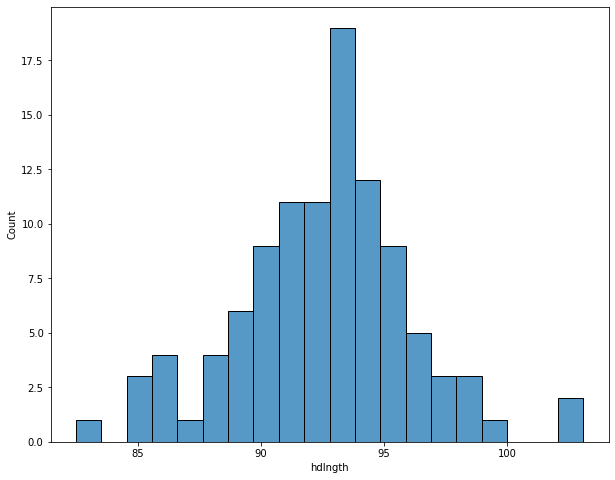

In [4]:
sns.histplot(df["hdlngth"],  bins=20);

In [5]:
stats.shapiro(df["hdlngth"])

ShapiroResult(statistic=0.9823063015937805, pvalue=0.1799636334180832)

Nuestra variable respuesta cumple asunción de normalidad

# 2. Homogeneidad de varianzas

H0: varianzas son iguales
H1: varianzas son diferentes

| Test Levene  |  Resultado | Conclusión   |
|---|---|---|
|  p-value > 0.05 | No significativo   | Cumple asunción, tienen varianzas similares|
|p-value < 0.05 (rechazamos H0)| Significativo| No cumple asunción, no tienen varianzas similares |

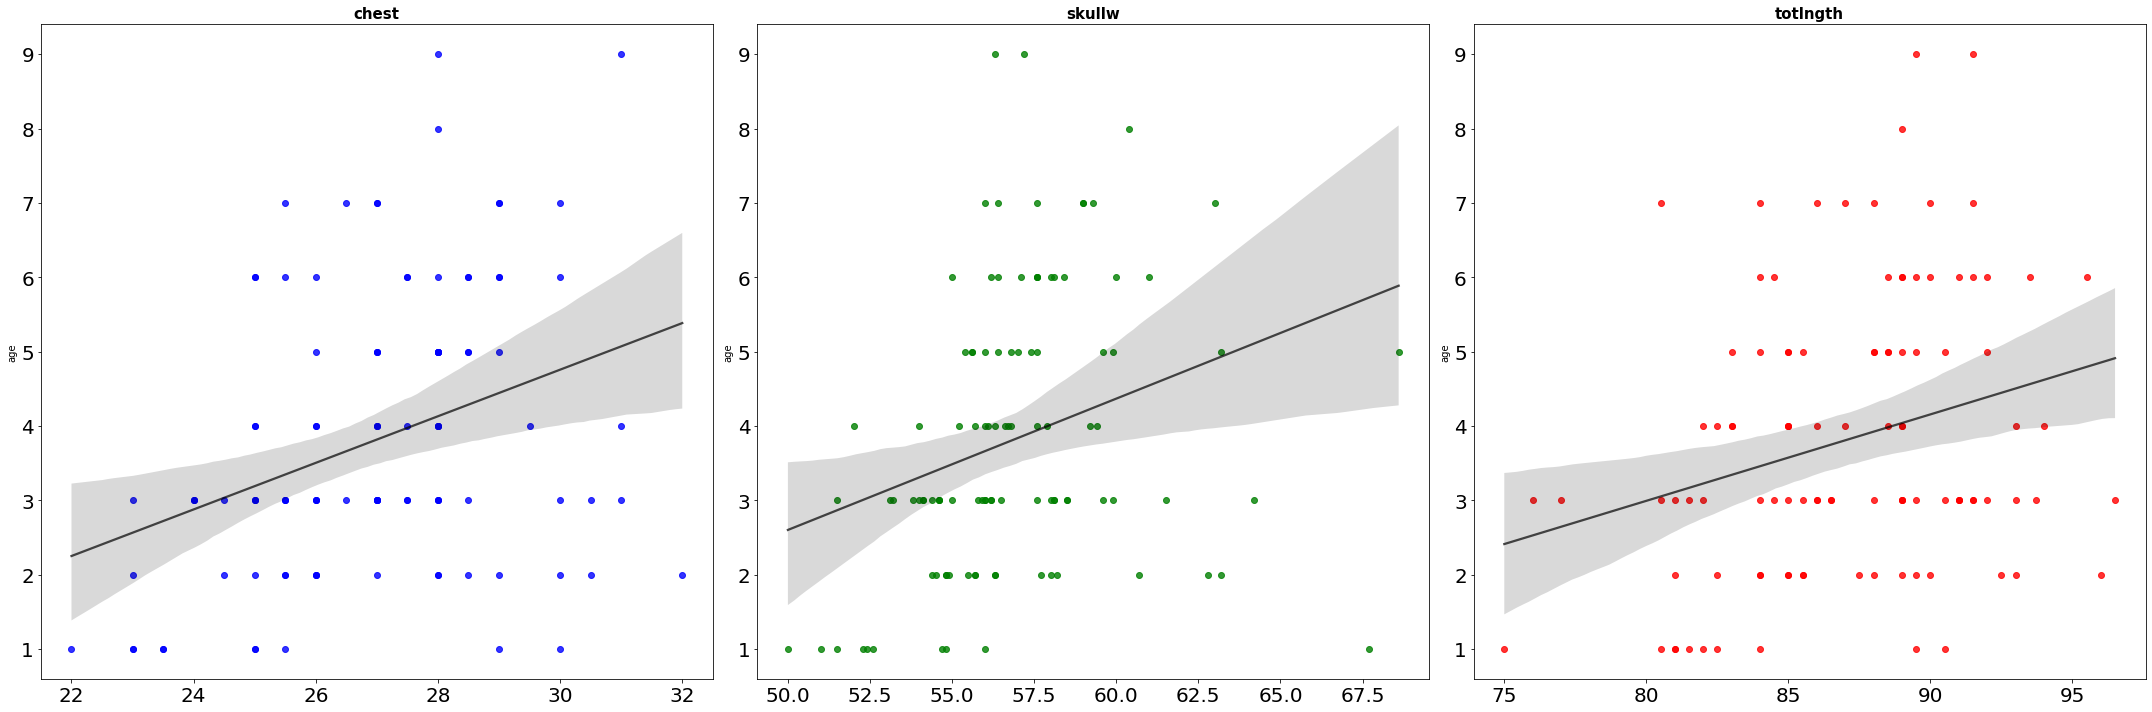

In [6]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_predictoras = ["chest", "skullw", "totlngth"]
lista_colores = ["blue", "green", "red"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat


# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(lista_predictoras): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'age',
        color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

In [7]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}

#iteremos por la lista de las columnas numéricas
for col in lista_predictoras:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.hdlngth, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

In [8]:
resultados

{'chest': 0.00010974539563879028,
 'skullw': 0.16117851888599272,
 'totlngth': 0.012089648865586994}

Skullw cumple la asunción de homocedasticidad

# 3. Independencia de variables

H0: variables independientes
H1: variables son dependientes

| Test Independencia |  Resultado | Conclusión   |
|---|---|---|
|  p-value > 0.05 | No significativo   | Variables son independientes|
|p-value < 0.05 (rechazamos H0)| Significativo| Variables dependientes |

In [9]:
# comparamos las variables predictoras entre ellas
# skullw con chest
# skullw con totlngth
# chest con totlngth

In [10]:
crosstab1, test_results1, expected = rp.crosstab(df["skullw"], df["chest"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [11]:
crosstab1.head()

chest                                                                  \
chest   22.0  23.0  23.5 24.0 24.5  25.0 25.5  26.0 26.5 27.0 27.5 28.0 28.5   
skullw                                                                         
50.0    0.96  0.00  0.00  0.0  0.0  0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
51.0    0.00  0.96  0.00  0.0  0.0  0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
51.5    0.00  0.96  0.00  0.0  0.0  0.96  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
52.0    0.00  0.00  0.00  0.0  0.0  0.00  0.0  0.96  0.0  0.0  0.0  0.0  0.0   
52.3    0.00  0.00  0.96  0.0  0.0  0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.0   

                                            
chest  29.0 29.5 30.0 30.5 31.0 32.0   All  
skullw                                      
50.0    0.0  0.0  0.0  0.0  0.0  0.0  0.96  
51.0    0.0  0.0  0.0  0.0  0.0  0.0  0.96  
51.5    0.0  0.0  0.0  0.0  0.0  0.0  1.92  
52.0    0.0  0.0  0.0  0.0  0.0  0.0  0.96  
52.3    0.0  0.0  0.0  0.0  0.0  0.0  0.96

In [12]:
test_results1

,Chi-square test,results
0,Pearson Chi-square ( 1134.0) =,1336.770
1,p-value =,0.000
2,Cramer's V =,0.845


In [13]:
# No son indepedientes

In [14]:
crosstab2, test_results2, expected = rp.crosstab(df["skullw"], df["totlngth"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [15]:
crosstab2.head()

totlngth                                                   ...       \
totlngth     75.0  76.0 77.0 80.5  81.0 81.5  82.0 82.5  83.0 84.0  ... 92.0   
skullw                                                              ...        
50.0         0.00  0.00  0.0  0.0  0.96  0.0  0.00  0.0  0.00  0.0  ...  0.0   
51.0         0.00  0.00  0.0  0.0  0.96  0.0  0.00  0.0  0.00  0.0  ...  0.0   
51.5         0.96  0.96  0.0  0.0  0.00  0.0  0.00  0.0  0.00  0.0  ...  0.0   
52.0         0.00  0.00  0.0  0.0  0.00  0.0  0.00  0.0  0.96  0.0  ...  0.0   
52.3         0.00  0.00  0.0  0.0  0.00  0.0  0.96  0.0  0.00  0.0  ...  0.0   

                                                        
totlngth 92.5 93.0 93.5 93.7 94.0 95.5 96.0 96.5   All  
skullw                                                  
50.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.96  
51.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.96  
51.5      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.92  
52.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.96  
52.3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.96  

[5 rows x 35 columns]

In [16]:
test_results2

,Chi-square test,results
0,Pearson Chi-square ( 2079.0) =,2209.0788
1,p-value =,0.0235
2,Cramer's V =,0.8023


In [17]:
# No son indepedientes

In [18]:
crosstab3, test_results3, expected = rp.crosstab(df["chest"], df["totlngth"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [19]:
crosstab3.head()

totlngth                                                    ...       \
totlngth     75.0  76.0 77.0 80.5  81.0  81.5  82.0 82.5 83.0  84.0  ... 92.0   
chest                                                                ...        
22.0          0.0  0.00  0.0  0.0  0.96  0.00  0.00  0.0  0.0  0.00  ...  0.0   
23.0          0.0  0.96  0.0  0.0  0.96  0.96  0.00  0.0  0.0  0.00  ...  0.0   
23.5          0.0  0.00  0.0  0.0  0.00  0.00  0.96  0.0  0.0  0.96  ...  0.0   
24.0          0.0  0.00  0.0  0.0  0.00  0.00  0.96  0.0  0.0  0.00  ...  0.0   
24.5          0.0  0.00  0.0  0.0  0.00  0.00  0.00  0.0  0.0  1.92  ...  0.0   

                                                        
totlngth 92.5 93.0 93.5 93.7 94.0 95.5 96.0 96.5   All  
chest                                                   
22.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.96  
23.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.85  
23.5      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.92  
24.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.88  
24.5      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.92  

[5 rows x 35 columns]

In [20]:
test_results3


,Chi-square test,results
0,Pearson Chi-square ( 594.0) =,667.6267
1,p-value =,0.0191
2,Cramer's V =,0.5972


In [21]:
# No son indepedientes

Resumen:

Variable respuesta > normal

Homocedasticidad > skullw

Independencia > hay que quedarse con una 